## Business Problem
Historically, gold had been used as a form of currency in various parts of the world including the USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. Recently, emerging world economies, such as China, Russia, and India have been big buyers of gold, whereas the USA, SoUSA, South Africa, and Australia are among the big seller of gold.

Fractional change in gold price may result in huge profit or loss for investors as well as government banks.
Forecasting rise and fall in the daily gold rates can help investors to decide when to buy (or sell) the commodity. But Gold prices are dependent on many factors such as prices of other precious metals, prices of crude oil, stock exchange performance, Bonds prices, currency exchange rates, etc.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Business Objectives and Constraints
* To accurately predict the future adjusted closing price of Gold ETF (Exchang Traded Funds) across a given period of time in the future.
* The model should not take too long to return prediction (Latency concerns)
* To Maximize the Coefficient of determination (R2) as much as posible (the closer it is to 1 the better)
* To minimize the Root Mean Squared Error (RMSE) as much as posible (the closer it is to zero the better) 

#### Type of Machine Learning Problem
It is a Regression problem as the target variable (adjusted closing price) is a **continuous** value.

####  Performance Metric

- R^2 score (Coefficient of determination)
- RMSE (root mean squared error)

### Data Overview
- Data Source: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset <br><br>
- Data for this study is collected from November 18th 2011 to January 1st 2019 from various sources.<br><br>
- The dataset has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.<br><br>
- The historical data of Gold ETF fetched from Yahoo finance has 7 columns, Date, Open, High, Low, Close, Adjusted Close, and Volume, the difference between Adjusted Close and Close is that the closing price of a stock is the price of that stock at the close of the trading day. Whereas the adjusted closing price takes into account factors such as dividends, stock splits, and new stock offerings to determine a value. So, Adjusted Close is the outcome variable which is the value you have to predict.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="notebook", palette="coolwarm", style = 'ticks' ,font_scale = 1.2, color_codes=True)

## Loading Data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/SQL WORK/FINAL_USO.csv") #change the file path as applicable to you
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800


## Data Cleaning

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

### Sanitary check

In [ ]:
#sanitory check to observe the datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

#### Observation:
- No missing values
- The `Date` feature is of type `object`.

In [4]:
#converting the datatype of "Date" feature from "object" to "datetime"
data.Date = pd.to_datetime(data.Date, format="%Y-%m-%d" )

In [5]:
#checking for any missing values
data.isnull().values.any()

False

It is observed that `Close` and `Adj Close` are duplicates of each other as shown below, hence the need to drop one (`Close`)

In [ ]:
data[['Close', 'Adj Close']].head()

,Close,Adj Close
0,152.330002,152.330002
1,155.229996,155.229996
2,154.869995,154.869995
3,156.979996,156.979996
4,157.160004,157.160004


In [ ]:
#checking to see if features "Close" and "Adj Close" are duplicates
(data.Close.values == data['Adj Close'].values).all()

True

In [6]:
#droping the "Close" feature, since it's a duplicate of "Adj Close"
data.drop('Close', axis=1, inplace=True)

## Exploratory Data Analysis

In [ ]:
data.tail()

,Date,Open,High,Low,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,8449400,249.559998,250.190002,247.470001,249.919998,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


### Transforming the dataframe into a time series by turning the "Date" feature to index

In [7]:
#Transform dataframe into a time series by turning the "Date" feature into index
data.set_index('Date', inplace=True)

### Plot of Gold price over time
Lets plot just the target variable against time and check for seasonality and trend (how the prices of gold varies over time)

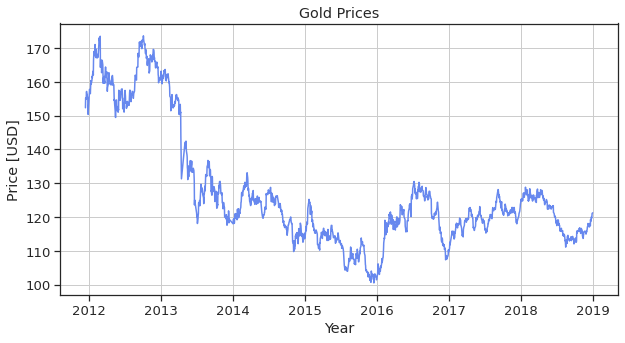

In [ ]:
#data['Adj Close'].plot()
plt.figure(figsize=(10,5))
plt.plot(data['Adj Close'])
plt.xlabel('Year')
plt.ylabel('Price [USD]')
plt.title('Gold Prices')
plt.grid()
plt.show()

### Observation
Here we can clearly see that gold prices are very high in the time period of 2012 to 2013. And since then, there has been a general decline in the price till 2016, then a little rise between 2016 and late 2018 with some fluctuations in between.

### Zooming in to the last 3 years of data
Lets have a closer look at the trend for the last 3 years

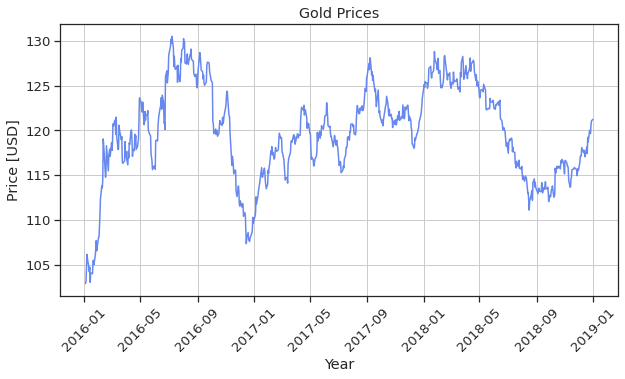

In [ ]:
last_3_years = data['Adj Close'].loc[data.index>='2016-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_3_years)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Price [USD]')
plt.title('Gold Prices')
plt.grid()
plt.show()

### Zooming in closer to the last 2 years of data
Lets have a closer look at the trend for the last 2 years, we may be able to see things more clearly

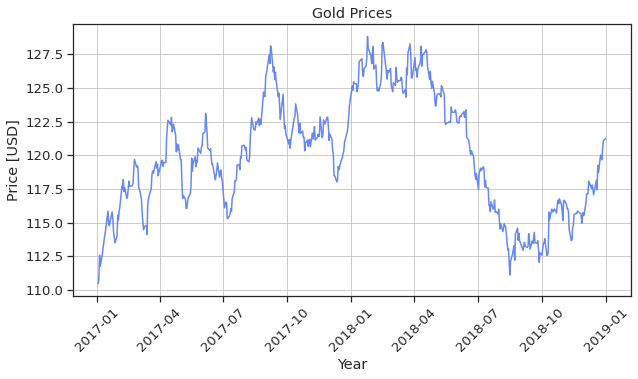

In [ ]:
last_2_years = data['Adj Close'].loc[data.index>='2017-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_2_years)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Price [USD]')
plt.title('Gold Prices')
plt.grid()
plt.show()

### Observation
As we zoom closer, we observed that there exist some level of seasonality in the Gold Prices and some seasonality are higher than others, hence the need to transform the seasonality into a stationary data by subtracting the previous seasonality from the current seasonality.

### Zooming in even closer to just last one year of data

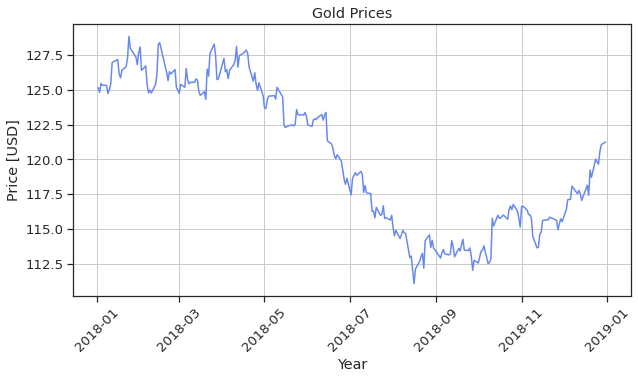

In [ ]:
last_1_years = data['Adj Close'].loc[data.index>='2018-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_1_years)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Price [USD]')
plt.title('Gold Prices')
plt.grid()
plt.show()

### Observation
Looking at the graph above, it can be seen that the first quarter (Jan to Apr) of 2018 recorded the highest and steady price of Gold for the year, after which there was a steady decline up till mid August, then increases a little and remain almost steady till around mid September before it then started recording a almost steady increace till the end of the year (2018). But on a high level note, 2018 recorded a general decreasing trend in Gold Price.

## AutoCorrelation:
Autocorrelation is the correlation of a point in the series with a point with lag (previous point) taken as one day of the same series. If a series show a positive autocorrelation then we say the series is **momentum** (trend following) and if the series shows a negative autocorrelation then we say the series is **mean reversing**. (Mean reversion is a financial term for the assumption that an asset's price will tend to converge to the average price over time, read more about **Mean reversion** [here](https://en.wikipedia.org/wiki/Mean_reversion_(finance)))

In python we can use pandas autocorr() function to calculate autocorrelation of a series.

In [ ]:
#calculating the Autocorrelation of the "Adj Close" using the python's inbuild "autocorr()" function
print(data['Adj Close'].autocorr())

0.9974383274693519


### Observation
Here the autocorrelation value is positive and high (**0.997438**), hence we can conclude that the series is a trend following series.

## Percentage Change
Lets use the pct_change() function available in pandas to see how the prices of Gold changes over a time lag in days.
This is useful in comparing the percentage of change in a time series of elements.
This function by default calculates the percentage change from the immediately previous row. It output first row as NaN so we have to apply dropna(). Here we test percent change in gold price to check that series is a random walk or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller
time_period = 20
results = adfuller(data['Adj Close'].pct_change(periods=time_period).dropna())
print(f'The % change of any current price from the last {time_period} days is: {round(results[1], 6)*100}%')

The % change of any current price from the last 20 days is: 0.0015%


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Observation on the percentage change
The percentage change of any current price with that of 20 days ago is: 0.002%, which is a strong indication that the price of Gold at any given time $\tau$ is not a random walk but a function of trend. Hence we may want to experiment by trying to predict the Gold price using just the trend information (with the help of **Autoregressive models**), then compare the result with the prediction that takes into account other features.

## Correlation of features to the target ("Adj Close")

In [9]:
#checking for correlation between features and target variable
corr_data = data.corr()#.abs()['Adj Close'].sort_values(ascending=False)
corr_data

,Open,High,Low,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Open,1.000000,0.999515,0.999442,0.998976,0.251921,-0.684314,-0.684597,-0.683464,-0.683998,-0.665788,...,0.975479,0.974596,0.974098,-0.514230,0.634872,0.634864,0.634277,0.635138,0.635138,-0.455920
High,0.999515,1.000000,0.999262,0.999535,0.261064,-0.688118,-0.688365,-0.687325,-0.687817,-0.669657,...,0.975650,0.975341,0.974746,-0.508782,0.637101,0.637208,0.636538,0.637483,0.637483,-0.454913
Low,0.999442,0.999262,1.000000,0.999532,0.237031,-0.680911,-0.681242,-0.679988,-0.680567,-0.662325,...,0.975337,0.974568,0.974182,-0.519988,0.633591,0.633623,0.633140,0.633994,0.633994,-0.457628
Adj Close,0.998976,0.999535,0.999532,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,-0.666071,...,0.975561,0.975459,0.974980,-0.514616,0.635197,0.635311,0.634732,0.635675,0.635675,-0.456193
Volume,0.251921,0.261064,0.237031,0.246778,1.000000,-0.218726,-0.216355,-0.223317,-0.220631,-0.208594,...,0.241727,0.248752,0.250313,0.302225,0.082632,0.083064,0.080475,0.081642,0.081642,0.069580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USO_High,0.634864,0.637208,0.633623,0.635311,0.083064,-0.774626,-0.775482,-0.773550,-0.774799,-0.786760,...,0.614587,0.614766,0.600523,-0.522581,0.999857,1.000000,0.999818,0.999867,0.999867,-0.695678
USO_Low,0.634277,0.636538,0.633140,0.634732,0.080475,-0.771235,-0.772154,-0.770087,-0.771396,-0.783347,...,0.613844,0.613931,0.599819,-0.523956,0.999848,0.999818,1.000000,0.999879,0.999879,-0.702665
USO_Close,0.635138,0.637483,0.633994,0.635675,0.081642,-0.773099,-0.773957,-0.771928,-0.773159,-0.785103,...,0.614733,0.614915,0.600756,-0.523801,0.999699,0.999867,0.999879,1.000000,1.000000,-0.699221
USO_Adj Close,0.635138,0.637483,0.633994,0.635675,0.081642,-0.773099,-0.773957,-0.771928,-0.773159,-0.785103,...,0.614733,0.614915,0.600756,-0.523801,0.999699,0.999867,0.999879,1.000000,1.000000,-0.699221


### Visualizing the correlation of features to the target

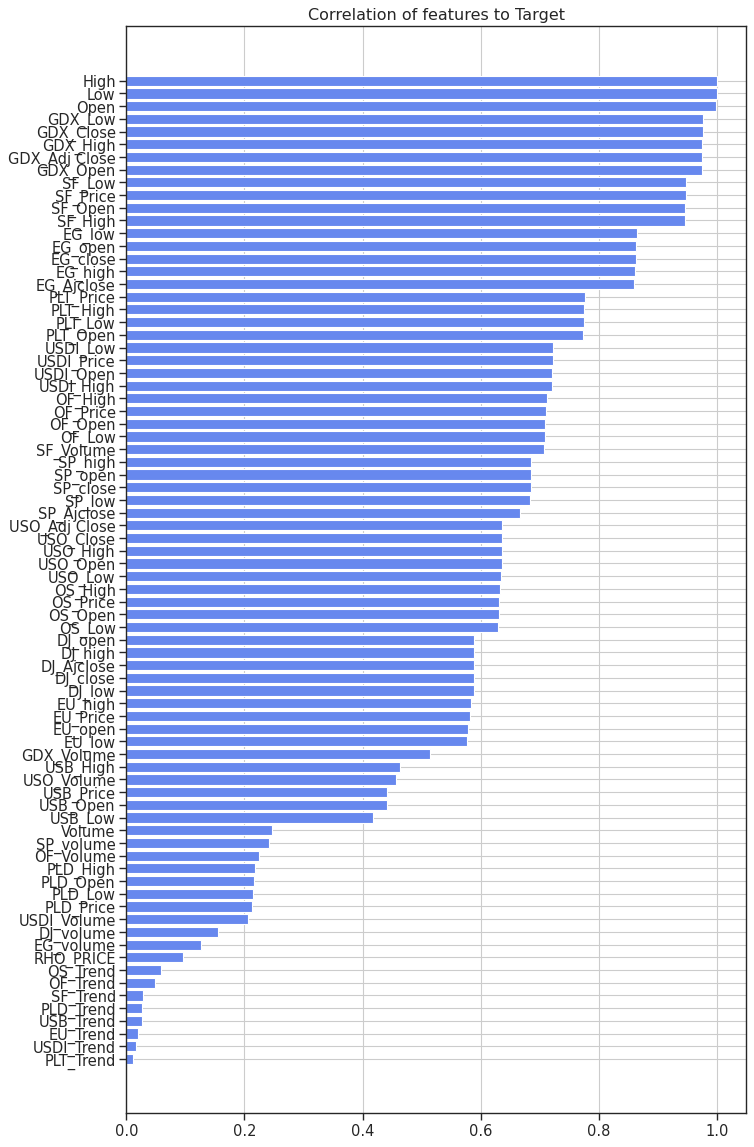

In [ ]:
def plot_corr_scores(corr_data, target):
    """
    Displays the horizontal bar plot showing how features are correlated with the target variable
    corr_data: The DataFrame containing the correlation scores between all the features
    target: The dependent variable whoes value you aim to predict
    """
    scores = corr_data.abs()[target].drop(target)
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Correlation of features to Target")
    plt.grid()
    
plt.figure(dpi=80, figsize=(10,18))
plot_corr_scores(corr_data, 'Adj Close')

In [ ]:
corr_data

Adj Close     1.000000
High          0.999535
Low           0.999532
Open          0.998976
GDX_Low       0.975561
                ...   
PLD_Trend     0.026536
USB_Trend     0.025933
EU_Trend      0.019913
USDI_Trend    0.016641
PLT_Trend     0.011355
Name: Adj Close, Length: 79, dtype: float64

## Making a dataframe of highly correlated features

In [10]:
#selecting features that are highly correlated with the target variable "Adj Close"
high_corr_features = list(corr_data[corr_data >= 0.3].index)
high_corr_features.insert(0, 'Date')

high_corr_df = data.reset_index()[high_corr_features]
high_corr_df.set_index('Date', inplace=True)
high_corr_df.head(2)

,Open,High,Low,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,...,51.570000,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,...,52.040001,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800


## Splitting the data into Train and Test sets
Since it is a time series data, it will be splited on the time axis in order to avoid data leakage.

In [11]:
features_data = high_corr_df.drop('Adj Close', axis=1)
target = high_corr_df['Adj Close']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_data, target, test_size=.3, shuffle=False)

### Splitting the Train data further for training and cross validation 

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, shuffle=False)


## Data Normalization

USING MINMAXSCALER

In [35]:
type(y_train)

pandas.core.series.Series

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
norm_xtrain = scaler.fit_transform(X_train)
norm_xval = scaler.fit_transform(X_val)
norm_xtest = scaler.fit_transform(X_test)

norm_ytrain = scaler.fit_transform(y_train.values.reshape(-1,1))
norm_yval = scaler.fit_transform(y_val.values.reshape(-1,1))
norm_ytest = scaler.fit_transform(y_test.values.reshape(-1,1))

USING STANDARDSCALAR

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stand_xtrain = scaler.fit_transform(X_train)
stand_xval = scaler.fit_transform(X_val)
stand_xtest = scaler.fit_transform(X_test)

stand_ytrain = scaler.fit_transform(y_train.values.reshape(-1,1))
stand_yval = scaler.fit_transform(y_val.values.reshape(-1,1))
stand_ytest = scaler.fit_transform(y_test.values.reshape(-1,1))

## Feature Engineering

## Modelling

USING HISTORIC DATA 


In [16]:
train_label = list(y_train)
type(train_label)

list

In [17]:
val_label = list(y_val)
type(val_label)

list

In [18]:
test_label = list(y_test)
type(test_label)

list

In [19]:
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

# choose a number of time steps
n_steps = 7
# split into samples
Xtrain1, ytrain1 = split_sequence(train_label, n_steps)
# summarize the data
print(Xtrain1.shape, ytrain1.shape)

(954, 7) (954,)


In [20]:
Xtrain1[0], ytrain1[0]

(array([152.330002, 155.229996, 154.869995, 156.979996, 157.160004,
        156.039993, 156.309998]), 154.910004)

In [21]:
# choose a number of time steps
n_steps = 7
# split into samples
Xval1, yval1 = split_sequence(val_label, n_steps)
# summarize the data
print(Xval1.shape, yval1.shape)

(234, 7) (234,)


In [22]:
# choose a number of time steps
n_steps = 7
# split into samples
Xtest1, ytest1 = split_sequence(test_label, n_steps)
# summarize the data
print(Xtest1.shape, ytest1.shape)

(509, 7) (509,)


In [23]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
model1 = dt.fit(Xtrain1, ytrain1)


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
def validate_result(model,val_x, val_y):
    predicted = model.predict(val_x)
    RSME_score = np.sqrt(mean_squared_error(val_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(val_y, predicted)
    print('R2 score: ', R2_score)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
def test_result(model,test_x, test_y):
    predicted = model.predict(test_x)
    RSME_score = np.sqrt(mean_squared_error(test_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(test_y, predicted)
    print('R2 score: ', R2_score)

In [26]:
validate_result(model1,Xval1, yval1)

RMSE:  1.8211175400361992
R2 score:  0.9320027171517391


In [27]:
test_result(model1,Xtest1, ytest1)

RMSE:  1.4168135415514012
R2 score:  0.9049905367275851


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor

clf = [ LinearRegression(), DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0),
       LassoCV(),  RidgeCV(), linear_model.BayesianRidge(),GradientBoostingRegressor(),
       SGDRegressor()]
models = [ 'LR', 'DTR', 'RFR', 'LC', 'RC', 'LMB', 'GBR', 'SGDR', ]

for clf, model in zip(clf,models):
  clf.fit ( Xtrain1, ytrain1)
  print ( f'performance of {model} on val:')
  validate_result(clf,Xval1, yval1)
  print("\n")
  print ( f'performance of {model} on test:')
  test_result(clf,Xtest1, ytest1)
  print("\n")

performance of LR on val:
RMSE:  1.2568010452188065
R2 score:  0.9676146443595905


performance of LR on test:
RMSE:  0.7504575769826886
R2 score:  0.9733440748554945


performance of DTR on val:
RMSE:  1.8211175400361992
R2 score:  0.9320027171517391


performance of DTR on test:
RMSE:  1.4168135415514012
R2 score:  0.9049905367275851


performance of RFR on val:
RMSE:  1.3708346610711561
R2 score:  0.9614711755967957


performance of RFR on test:
RMSE:  0.9048014759109121
R2 score:  0.9612521091939668


performance of LC on val:
RMSE:  1.25520391725623
R2 score:  0.9676969019172597


performance of LC on test:
RMSE:  0.7476059434700055
R2 score:  0.9735462675244646


performance of RC on val:
RMSE:  1.2569762257567547
R2 score:  0.9676056155965534


performance of RC on test:
RMSE:  0.7505064060396557
R2 score:  0.9733406059691201


performance of LMB on val:
RMSE:  1.2571096312118801
R2 score:  0.9675987390672512


performance of LMB on test:
RMSE:  0.7505513038374239
R2 score:  0.9

#USING ALL FEATURES

In [44]:
X = data.drop('Adj Close', axis=1)
y = data['Adj Close']
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=.3, shuffle=False)
X_tr, X_va, y_tr, y_va = train_test_split(X_tr, y_tr, test_size=.2, shuffle=False)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
norm_xtr = scaler.fit_transform(X_tr)
norm_xva = scaler.fit_transform(X_va)
norm_xte = scaler.fit_transform(X_te)

norm_ytr = scaler.fit_transform(y_tr.values.reshape(-1,1))
norm_yva = scaler.fit_transform(y_va.values.reshape(-1,1))
norm_yte = scaler.fit_transform(y_te.values.reshape(-1,1))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stand_xtr = scaler.fit_transform(X_tr)
stand_xva = scaler.fit_transform(X_va)
stand_xte = scaler.fit_transform(X_te)

stand_ytr = scaler.fit_transform(y_tr.values.reshape(-1,1))
stand_yva = scaler.fit_transform(y_va.values.reshape(-1,1))
stand_yte = scaler.fit_transform(y_te.values.reshape(-1,1))

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor

clf = [ LinearRegression(), DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0),
       LassoCV(),  RidgeCV(), linear_model.BayesianRidge(),GradientBoostingRegressor(),
       SGDRegressor()]
models = [ 'LR', 'DTR', 'RFR', 'LC', 'RC', 'LMB', 'GBR', 'SGDR', ]

for clf, model in zip(clf,models):
  clf.fit ( X_tr, y_tr )
  print ( f'performance of {model} on val:')
  validate_result(clf,X_va, y_va)
  print("\n")
  print ( f'performance of {model} on test:')
  test_result(clf,X_te, y_te)
  print("\n")

performance of LR on val:
RMSE:  0.2949751108825062
R2 score:  0.9984526484799827


performance of LR on test:
RMSE:  0.4017070713097917
R2 score:  0.9925854776610176


performance of DTR on val:
RMSE:  0.7662900369687891
R2 score:  0.989557497260499


performance of DTR on test:
RMSE:  0.6449630742170085
R2 score:  0.9808867770278622


performance of RFR on val:
RMSE:  0.5523859221293826
R2 score:  0.9945737044635571


performance of RFR on test:
RMSE:  0.31825306582956775
R2 score:  0.9953461817692718


performance of LC on val:
RMSE:  24.75509561009006
R2 score:  -9.898016367062713


performance of LC on test:
RMSE:  14.112519583883685
R2 score:  -8.151100811265755


performance of RC on val:
RMSE:  127524.24811135698
R2 score:  -289203657.7387929


performance of RC on test:
RMSE:  466836.3506622994
R2 score:  -10013676460.637054


performance of LMB on val:
RMSE:  0.29784987915205763
R2 score:  0.9984223411564516


performance of LMB on test:
RMSE:  0.476490314068881
R2 score:  0.

In [46]:
clf = [ LinearRegression(), DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0),
       LassoCV(),  RidgeCV(), linear_model.BayesianRidge(),GradientBoostingRegressor(),
       SGDRegressor()]
models = [ 'LR', 'DTR', 'RFR', 'LC', 'RC', 'LMB', 'GBR', 'SGDR', ]

for clf, model in zip(clf,models):
  clf.fit ( norm_xtr, norm_ytr)
  print ( f'performance of {model} on val:')
  validate_result(clf,norm_xva, norm_yva)
  print("\n")
  print ( f'performance of {model} on test:')
  test_result(clf,norm_xte, norm_yte)
  print("\n")


performance of LR on val:
RMSE:  0.010024862471588148
R2 score:  0.9983893670556018


performance of LR on test:
RMSE:  0.011291572051105609
R2 score:  0.9972945088467243


performance of DTR on val:
RMSE:  0.02459978359024912
R2 score:  0.9903015505975892


performance of DTR on test:
RMSE:  0.022413892753536637
R2 score:  0.9893396398503244




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


performance of RFR on val:
RMSE:  0.02540148015721237
R2 score:  0.9896591133154221


performance of RFR on test:
RMSE:  0.04011538643640185
R2 score:  0.9658524729030344




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e-02, tolerance: 7.893e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarnin

performance of LC on val:
RMSE:  0.016596675449030204
R2 score:  0.9955854958029573


performance of LC on test:
RMSE:  0.016649789345767187
R2 score:  0.9941175968667075


performance of RC on val:
RMSE:  0.016969829158193703
R2 score:  0.9953847559446517


performance of RC on test:
RMSE:  0.025274579180051097
R2 score:  0.9864448238793404


performance of LMB on val:
RMSE:  0.009908280039087412
R2 score:  0.9984266103950807


performance of LMB on test:
RMSE:  0.01121740658149253
R2 score:  0.9973299326214942


performance of GBR on val:
RMSE:  0.026675898145861042
R2 score:  0.9885954584352845


performance of GBR on test:
RMSE:  0.035979816224371075
R2 score:  0.9725302201120194


performance of SGDR on val:
RMSE:  0.09568189228558126
R2 score:  0.8532766471501682


performance of SGDR on test:
RMSE:  0.2341447579331381
R2 score:  -0.1633387016817187




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:

clf = [ LinearRegression(), DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0),
       LassoCV(),  RidgeCV(), linear_model.BayesianRidge(),GradientBoostingRegressor(),
       SGDRegressor()]
models = [ 'LR', 'DTR', 'RFR', 'LC', 'RC', 'LMB', 'GBR', 'SGDR', ]

for clf, model in zip(clf,models):
  clf.fit ( stand_xtrain, stand_ytrain)
  print ( f'performance of {model} on val:')
  validate_result(clf,stand_xva, stand_yva)
  print("\n")
  print ( f'performance of {model} on test:')
  test_result(clf,stand_xte, stand_yte)
  print("\n")

performance of LR on val:
RMSE:  0.04652527188135837
R2 score:  0.9978353990763656


performance of LR on test:
RMSE:  0.03931365654889272
R2 score:  0.9984544364087558


performance of DTR on val:
RMSE:  0.2515750037122085
R2 score:  0.9367100175072023


performance of DTR on test:
RMSE:  0.20388092984229758
R2 score:  0.9584325664466401




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


performance of RFR on val:
RMSE:  0.23900175408663735
R2 score:  0.9428781615435106


performance of RFR on test:
RMSE:  0.196057313615548
R2 score:  0.9615615297778547




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e-01, tolerance: 7.680e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarnin

performance of LC on val:
RMSE:  0.059779187942199004
R2 score:  0.9964264486889712


performance of LC on test:
RMSE:  0.06294596316477151
R2 score:  0.9960378057212592


performance of RC on val:
RMSE:  0.04129116756817084
R2 score:  0.9982950394808572


performance of RC on test:
RMSE:  0.04288901055216679
R2 score:  0.9981605327738561


performance of LMB on val:
RMSE:  0.0446244471008839
R2 score:  0.9980086587209405


performance of LMB on test:
RMSE:  0.03871837117020447
R2 score:  0.9985008877339263


performance of GBR on val:
RMSE:  0.2573696449182083
R2 score:  0.9337608658746753


performance of GBR on test:
RMSE:  0.2546460569195804
R2 score:  0.9351553856953098


performance of SGDR on val:
RMSE:  0.21180404118855775
R2 score:  0.9551390481361958


performance of SGDR on test:
RMSE:  0.8002566613657458
R2 score:  0.3595892759397501




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#USING HIGHLY CORRELATED FEATURES

MODELLING WITHOUT NORMALIZATION OR STANDARDIZATION

In [28]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
model2 = dt.fit(X_train, y_train)

In [29]:
validate_result(model2,X_val, y_val)

RMSE:  0.7662900369687891
R2 score:  0.989557497260499


In [30]:
test_result(model2,X_test, y_test)

RMSE:  0.6449630742170085
R2 score:  0.9808867770278622


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor

clf = [ LinearRegression(), DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0),
       LassoCV(),  RidgeCV(), linear_model.BayesianRidge(),GradientBoostingRegressor(),
       SGDRegressor()]
models = [ 'LR', 'DTR', 'RFR', 'LC', 'RC', 'LMB', 'GBR', 'SGDR', ]

for clf, model in zip(clf,models):
  clf.fit ( X_train, y_train )
  print ( f'performance of {model} on val:')
  validate_result(clf,X_val, y_val)
  print("\n")
  print ( f'performance of {model} on test:')
  test_result(clf,X_test, y_test)
  print("\n")

performance of LR on val:
RMSE:  0.2949751108825062
R2 score:  0.9984526484799827


performance of LR on test:
RMSE:  0.4017070713097917
R2 score:  0.9925854776610176


performance of DTR on val:
RMSE:  0.7662900369687891
R2 score:  0.989557497260499


performance of DTR on test:
RMSE:  0.6449630742170085
R2 score:  0.9808867770278622


performance of RFR on val:
RMSE:  0.5523859221293826
R2 score:  0.9945737044635571


performance of RFR on test:
RMSE:  0.31825306582956775
R2 score:  0.9953461817692718


performance of LC on val:
RMSE:  24.75509561009006
R2 score:  -9.898016367062713


performance of LC on test:
RMSE:  14.112519583883685
R2 score:  -8.151100811265755


performance of RC on val:
RMSE:  127524.24811135698
R2 score:  -289203657.7387929


performance of RC on test:
RMSE:  466836.3506622994
R2 score:  -10013676460.637054


performance of LMB on val:
RMSE:  0.29784987915205763
R2 score:  0.9984223411564516


performance of LMB on test:
RMSE:  0.476490314068881
R2 score:  0.

##From above it can be seen that Random Forest Regressor  had the best RMSE of 0.31825 and R squared result of 0.99535

MODELLING WITH NORMALIZED DATA

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor

clf = [ LinearRegression(), DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0),
       LassoCV(),  RidgeCV(), linear_model.BayesianRidge(),GradientBoostingRegressor(),
       SGDRegressor()]
models = [ 'LR', 'DTR', 'RFR', 'LC', 'RC', 'LMB', 'GBR', 'SGDR', ]

for clf, model in zip(clf,models):
  clf.fit ( norm_xtrain, norm_ytrain)
  print ( f'performance of {model} on val:')
  validate_result(clf,norm_xval, norm_yval)
  print("\n")
  print ( f'performance of {model} on test:')
  test_result(clf,norm_xtest, norm_ytest)
  print("\n")

performance of LR on val:
RMSE:  0.014727942339005689
R2 score:  0.9967033515851088


performance of LR on test:
RMSE:  0.012680119872965382
R2 score:  0.9965881964525913


performance of DTR on val:
RMSE:  0.03725954902632691
R2 score:  0.9789009126469295


performance of DTR on test:
RMSE:  0.044086374773869966
R2 score:  0.9587573963596518




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


performance of RFR on val:
RMSE:  0.032873448239791075
R2 score:  0.9835759974020757


performance of RFR on test:
RMSE:  0.05787062578682566
R2 score:  0.9289353444605434




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e-02, tolerance: 6.958e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarnin

performance of LC on val:
RMSE:  0.020813142201501746
R2 score:  0.9934163947187067


performance of LC on test:
RMSE:  0.017740000429009768
R2 score:  0.9933220286733879


performance of RC on val:
RMSE:  0.029857353556162012
R2 score:  0.9864515034917393


performance of RC on test:
RMSE:  0.029759085998626412
R2 score:  0.9812078498047059


performance of LMB on val:
RMSE:  0.01423772924432244
R2 score:  0.9969191543439033


performance of LMB on test:
RMSE:  0.012319357628345785
R2 score:  0.9967795732621646


performance of GBR on val:
RMSE:  0.023571265694099296
R2 score:  0.9915558820993845


performance of GBR on test:
RMSE:  0.025269625658678976
R2 score:  0.9864501366700491


performance of SGDR on val:
RMSE:  0.10515929769746
R2 score:  0.831932462822153


performance of SGDR on test:
RMSE:  0.23626182248858663
R2 score:  -0.18447090533966826




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##From above it can be seen that Linear model bayesianRidge had the best RMSE of 0.01232 and R square result of 0.99156

MODELLING WITH NORMALIZED DATA

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor

clf = [ LinearRegression(), DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0),
       LassoCV(),  RidgeCV(), linear_model.BayesianRidge(),GradientBoostingRegressor(),
       SGDRegressor()]
models = [ 'LR', 'DTR', 'RFR', 'LC', 'RC', 'LMB', 'GBR', 'SGDR', ]

for clf, model in zip(clf,models):
  clf.fit ( stand_xtrain, stand_ytrain)
  print ( f'performance of {model} on val:')
  validate_result(clf,stand_xval, stand_yval)
  print("\n")
  print ( f'performance of {model} on test:')
  test_result(clf,stand_xtest, stand_ytest)
  print("\n")

performance of LR on val:
RMSE:  0.046080535132086695
R2 score:  0.9978765842819405


performance of LR on test:
RMSE:  0.03931365654889272
R2 score:  0.9984544364087558


performance of DTR on val:
RMSE:  0.16336721938153437
R2 score:  0.9733111516315456


performance of DTR on test:
RMSE:  0.20388092984229758
R2 score:  0.9584325664466401




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


performance of RFR on val:
RMSE:  0.1277837971342616
R2 score:  0.9836713011899498


performance of RFR on test:
RMSE:  0.196057313615548
R2 score:  0.9615615297778547




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e-01, tolerance: 7.680e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarnin

performance of LC on val:
RMSE:  0.06742121336052825
R2 score:  0.9954543799889941


performance of LC on test:
RMSE:  0.06294596316477151
R2 score:  0.9960378057212592


performance of RC on val:
RMSE:  0.0462195215470513
R2 score:  0.9978637558279616


performance of RC on test:
RMSE:  0.04288901055216679
R2 score:  0.9981605327738561


performance of LMB on val:
RMSE:  0.04531163684220853
R2 score:  0.9979468555666798


performance of LMB on test:
RMSE:  0.03871837117020447
R2 score:  0.9985008877339263


performance of GBR on val:
RMSE:  0.1292814875778332
R2 score:  0.9832862969696625


performance of GBR on test:
RMSE:  0.24030311708577373
R2 score:  0.942254411918861


performance of SGDR on val:
RMSE:  0.2570741088263181
R2 score:  0.9339129025711543


performance of SGDR on test:
RMSE:  0.7909321710401086
R2 score:  0.3744263008137805




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##From above it can be seen that Linear model bayesianRidge had the best RMSE of 0.03872 and R square result of 0.99850

## Model Evaluation

## Comparison (Tabular form)